In [28]:
# Import libs

from pycaret.datasets import get_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlflow

In [29]:
# Show all posible basic datasets

all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [30]:
# Grab blood dataset

df = get_data('blood')

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [31]:
df.isna().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


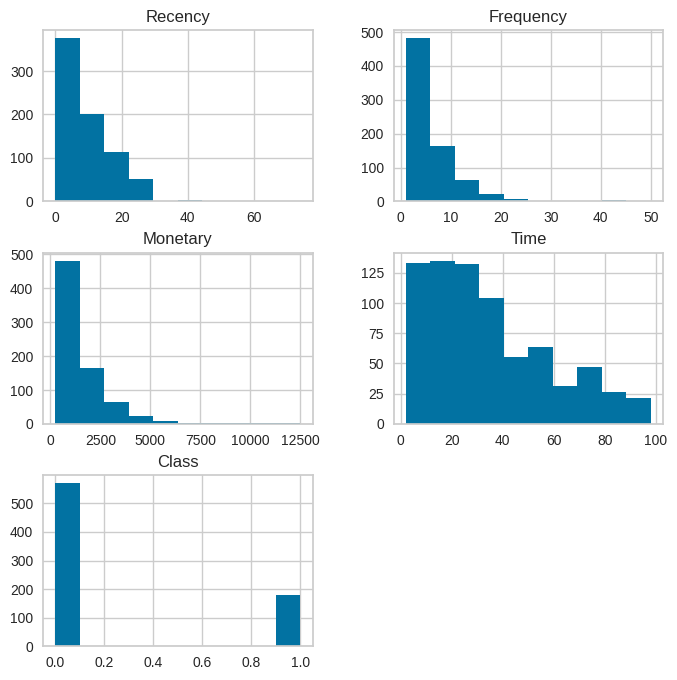

In [32]:
# Show histograms

df.hist(figsize = (8, 8))
plt.show()

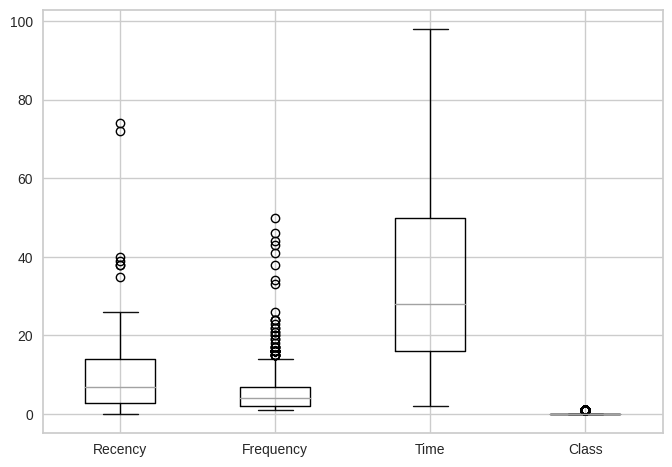

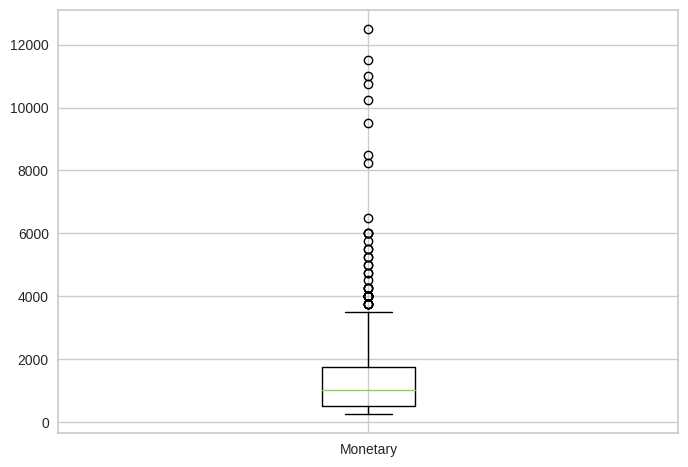

In [33]:
# Show boxplots

df.drop('Monetary', axis = 1).boxplot()
plt.show()

plt.boxplot(df['Monetary'], labels = ('Monetary',))
plt.show()

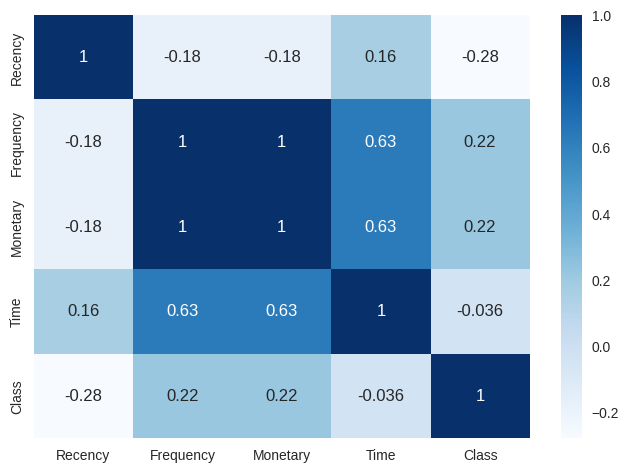

In [34]:
# Show Pirson's correlation matrix 

sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

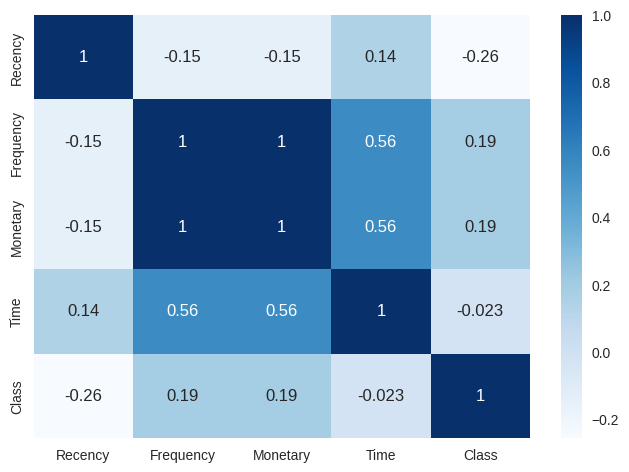

In [35]:
# Show Kendall's correlation matrix

sns.heatmap(df.corr(method = 'kendall'), annot = True, cmap = 'Blues')
plt.show()

In [36]:
# Eneble autolog for mlflow

mlflow.autolog()

2024/03/02 13:55:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2024/03/02 13:55:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/03/02 13:55:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [37]:
# Try to git first model

from pycaret.classification import *

s = setup(df, target = 'Class', session_id = 1212,
           log_experiment = True, experiment_name = 'blood_0')

,Description,Value
0,Session id,1212
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 5)"
4,Transformed data shape,"(748, 5)"
5,Transformed train set shape,"(523, 5)"
6,Transformed test set shape,"(225, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [39]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7706,0.7321,0.0801,0.5500,0.1377,0.0916,0.1530,0.0340
ada,Ada Boost Classifier,0.7705,0.6721,0.2321,0.6046,0.3161,0.2088,0.2509,0.0800
ridge,Ridge Classifier,0.7687,0.0000,0.0487,0.5500,0.0890,0.0600,0.1225,0.0290
gbc,Gradient Boosting Classifier,0.7667,0.6712,0.2885,0.5442,0.3678,0.2408,0.2640,0.0930
lr,Logistic Regression,0.7648,0.7394,0.0878,0.5400,0.1466,0.0872,0.1419,0.0500
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0250
nb,Naive Bayes,0.7516,0.6976,0.1865,0.4475,0.2567,0.1404,0.1615,0.0380
rf,Random Forest Classifier,0.7340,0.6398,0.2949,0.4213,0.3396,0.1811,0.1893,0.1390
lightgbm,Light Gradient Boosting Machine,0.7322,0.6664,0.2622,0.3941,0.3101,0.1546,0.1612,4.3740
et,Extra Trees Classifier,0.7225,0.6110,0.2872,0.3907,0.3231,0.1569,0.1630,0.1060


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [40]:
# Dismiss multicolourism

df = df.drop('Monetary', axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Time       748 non-null    int64
 3   Class      748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


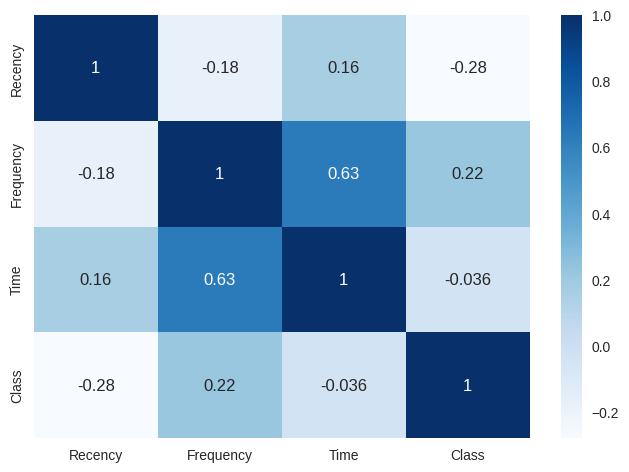

In [41]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

In [42]:
s = setup(df, target = 'Class', session_id = 1212,
           log_experiment = True, experiment_name = 'blood_1')

,Description,Value
0,Session id,1212
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 4)"
4,Transformed data shape,"(748, 4)"
5,Transformed train set shape,"(523, 4)"
6,Transformed test set shape,"(225, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [45]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7706,0.7376,0.1615,0.5050,0.2402,0.1572,0.1941,0.0340
lda,Linear Discriminant Analysis,0.7706,0.7321,0.0801,0.5500,0.1377,0.0916,0.1530,0.0320
ada,Ada Boost Classifier,0.7705,0.6721,0.2321,0.6046,0.3161,0.2088,0.2509,0.0780
ridge,Ridge Classifier,0.7687,0.0000,0.0487,0.5500,0.0890,0.0600,0.1225,0.0290
gbc,Gradient Boosting Classifier,0.7686,0.6699,0.2885,0.5542,0.3693,0.2445,0.2693,0.0890
nb,Naive Bayes,0.7668,0.7289,0.1532,0.5483,0.2299,0.1437,0.1870,0.0290
lr,Logistic Regression,0.7648,0.7394,0.0878,0.5400,0.1466,0.0872,0.1419,0.0380
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0290
rf,Random Forest Classifier,0.7416,0.6478,0.2782,0.4226,0.3280,0.1807,0.1886,0.1390
knn,K Neighbors Classifier,0.7360,0.6591,0.3295,0.4254,0.3690,0.2068,0.2102,0.0470


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [46]:
df['Class'].value_counts()

Class
0    570
1    178
Name: count, dtype: int64

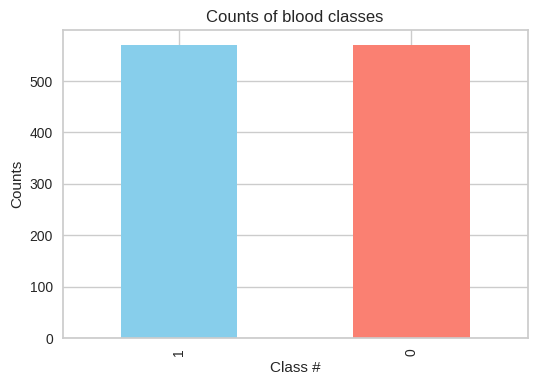

In [47]:
# Upsample data

from sklearn.utils import resample

df_majority = df[(df['Class'] == 0)]
df_minority = df[(df['Class'] == 1)]

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 570)

df = pd.concat([df_minority_upsampled, df_majority])

plt.figure(figsize = (6, 4))
df['Class'].value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Counts of blood classes')
plt.xlabel('Class #')
plt.ylabel('Counts')
plt.show()

In [51]:
s = setup(df, target = 'Class', session_id = 1212,
           log_experiment = True, experiment_name = 'blood_2', index = False)

,Description,Value
0,Session id,1212
1,Target,Class
2,Target type,Binary
3,Original data shape,"(2876, 4)"
4,Transformed data shape,"(2876, 4)"
5,Transformed train set shape,"(2013, 4)"
6,Transformed test set shape,"(863, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [52]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9339,0.9533,0.9913,0.9308,0.9601,0.7689,0.7827,0.1380
rf,Random Forest Classifier,0.9315,0.9514,0.9926,0.9272,0.9587,0.7579,0.7741,0.1600
dt,Decision Tree Classifier,0.9255,0.8702,0.9907,0.9223,0.9553,0.7343,0.7521,0.0320
lightgbm,Light Gradient Boosting Machine,0.9175,0.9240,0.9889,0.9153,0.9506,0.7036,0.7243,9.3400
gbc,Gradient Boosting Classifier,0.8813,0.8707,0.9858,0.8808,0.9302,0.5400,0.5837,0.1420
knn,K Neighbors Classifier,0.8768,0.8447,0.9740,0.8845,0.9269,0.5391,0.5699,0.0400
ada,Ada Boost Classifier,0.8500,0.8253,0.9715,0.8598,0.9122,0.4102,0.4530,0.0890
ridge,Ridge Classifier,0.8222,0.0000,0.9827,0.8279,0.8986,0.2150,0.2862,0.0290
lda,Linear Discriminant Analysis,0.8222,0.7652,0.9635,0.8389,0.8968,0.2741,0.3167,0.0330
lr,Logistic Regression,0.8202,0.7775,0.9653,0.8360,0.8959,0.2575,0.3028,0.0550


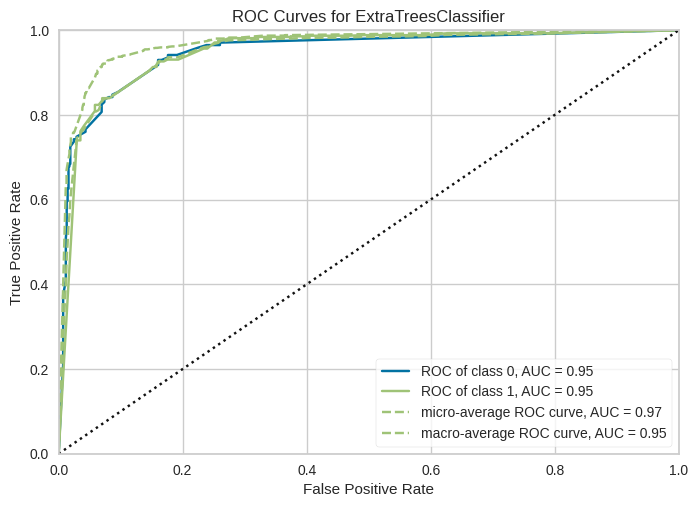

In [53]:
# Plot some heplfull metrics

plot_model(model, plot = 'auc')

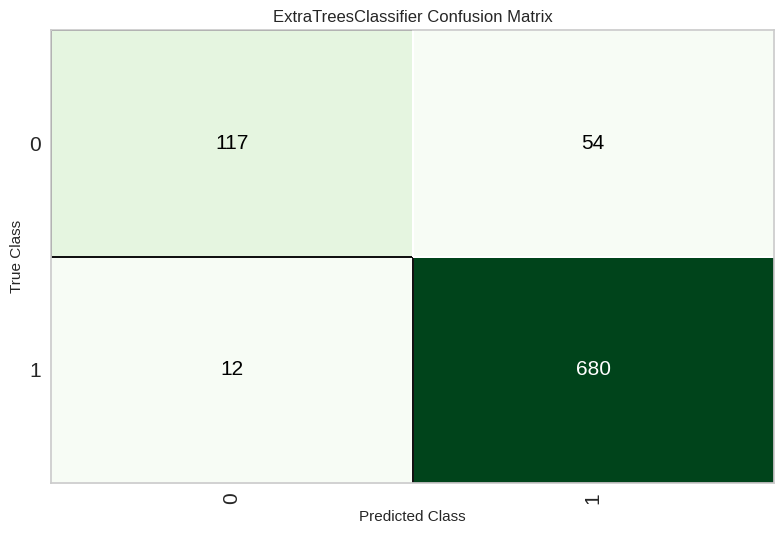

In [54]:
plot_model(model, plot = 'confusion_matrix')

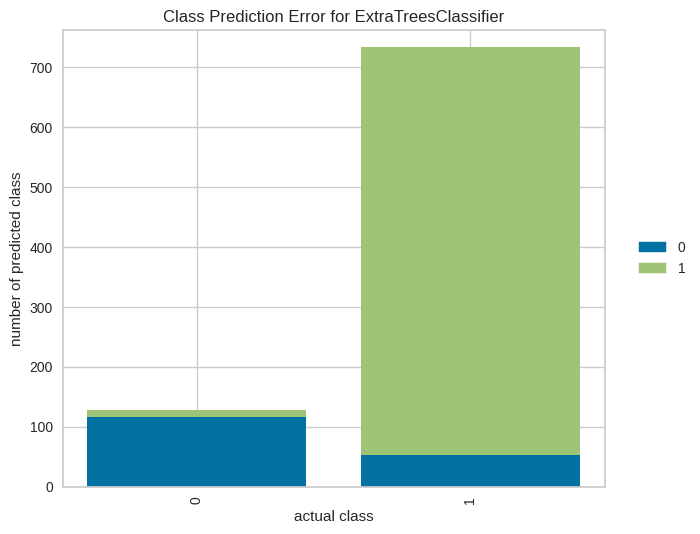

In [55]:
plot_model(model, plot = 'error')

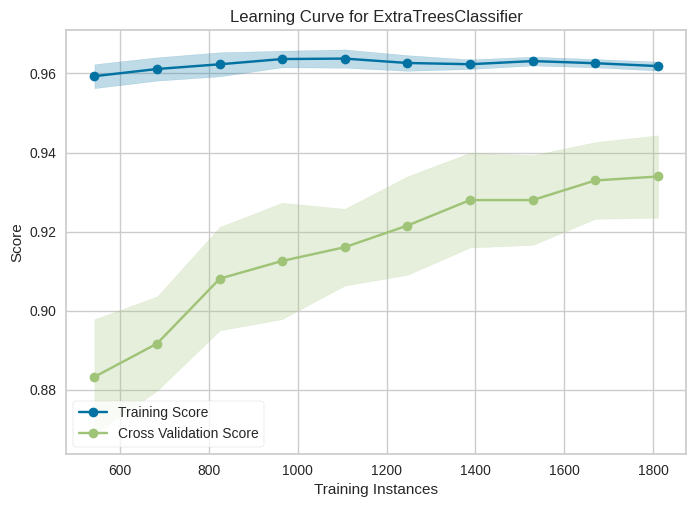

In [56]:
plot_model(model, plot = 'learning')

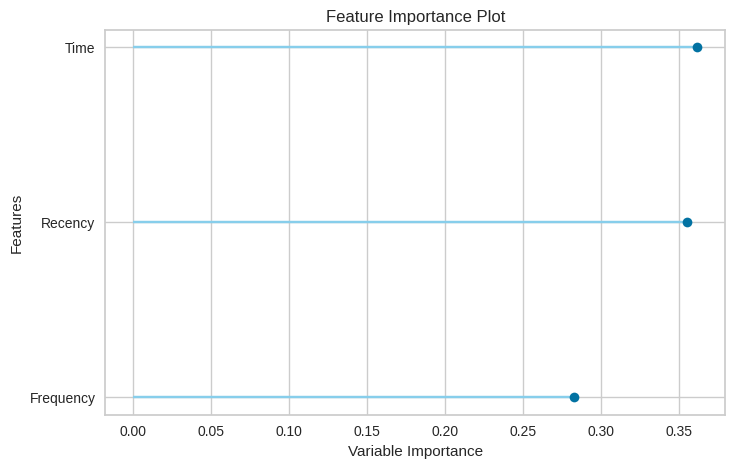

In [57]:
plot_model(model, plot = 'feature')

And show mlflow screenshot

![](Binary_Classification_AutoML.png)